# Check outputs

inputFiles/SnowMIP/FR-Cdp_spinup_final/job_options_file.txt

- 1995 to 2013 
- metLoop = 100
- spinfast = 1

Annual outputs only

In [1]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

In [2]:
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_spinup_final'

In [3]:
!ls {path}

actlyr_annually.nc	    ftablemax_annually.nc      npp_annually.nc
actlyrmax_annually.nc	    ftablemin_annually.nc      pr_annually.nc
actlyrmin_annually.nc	    fVegLitter_annually.nc     ra_annually.nc
albs_annually.nc	    gpp_annually.nc	       rh_annually.nc
cLand_annually.nc	    hfls_annually.nc	       rls_annually.nc
cLeaf_annually.nc	    hfss_annually.nc	       rmrveg_annually.nc
cRoot_annually.nc	    lai_annually.nc	       rss_annually.nc
cSoil_annually.nc	    landCoverFrac_annually.nc  sftlf.nc
cStem_annually.nc	    mrro_annually.nc	       tas_annually.nc
cVeg_annually.nc	    mrsfl_annually.nc	       tran_annually.nc
evspsbl_annually.nc	    mrsll_annually.nc	       vcmax0_annually.nc
fProductDecomp_annually.nc  nbp_annually.nc	       vegHeight_annually.nc
ftable_annually.nc	    nep_annually.nc


As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [4]:
freq = 'annually'

tas = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
# snd = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
# snw = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
cSoil = xr.open_dataset(path+'/cSoil_'+freq+'.nc').cSoil # Carbon mass in the full depth of the soil model
vegHeight = xr.open_dataset(path+'/vegHeight_'+freq+'.nc').vegHeight

tas

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/lalandmi/miniconda3/envs/

<xarray.DataArray 'tas' (time: 1900, lat: 1, lon: 1)>
array([[[278.917831]],

       [[278.535706]],

       ...,

       [[279.625175]],

       [[278.898739]]])
Coordinates:
  * time     (time) object 1995-12-31 00:00:00 ... 3895-02-08 00:00:00
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Near-surface air temperature at reference height
    units:       K
    nameInCode:  taacc_yr

## Check the carbon fluxes

Text(0.5, 0.98, 'Spinup Col de Porte (1995-2013) / metLoop = 100; spinfast = 1')

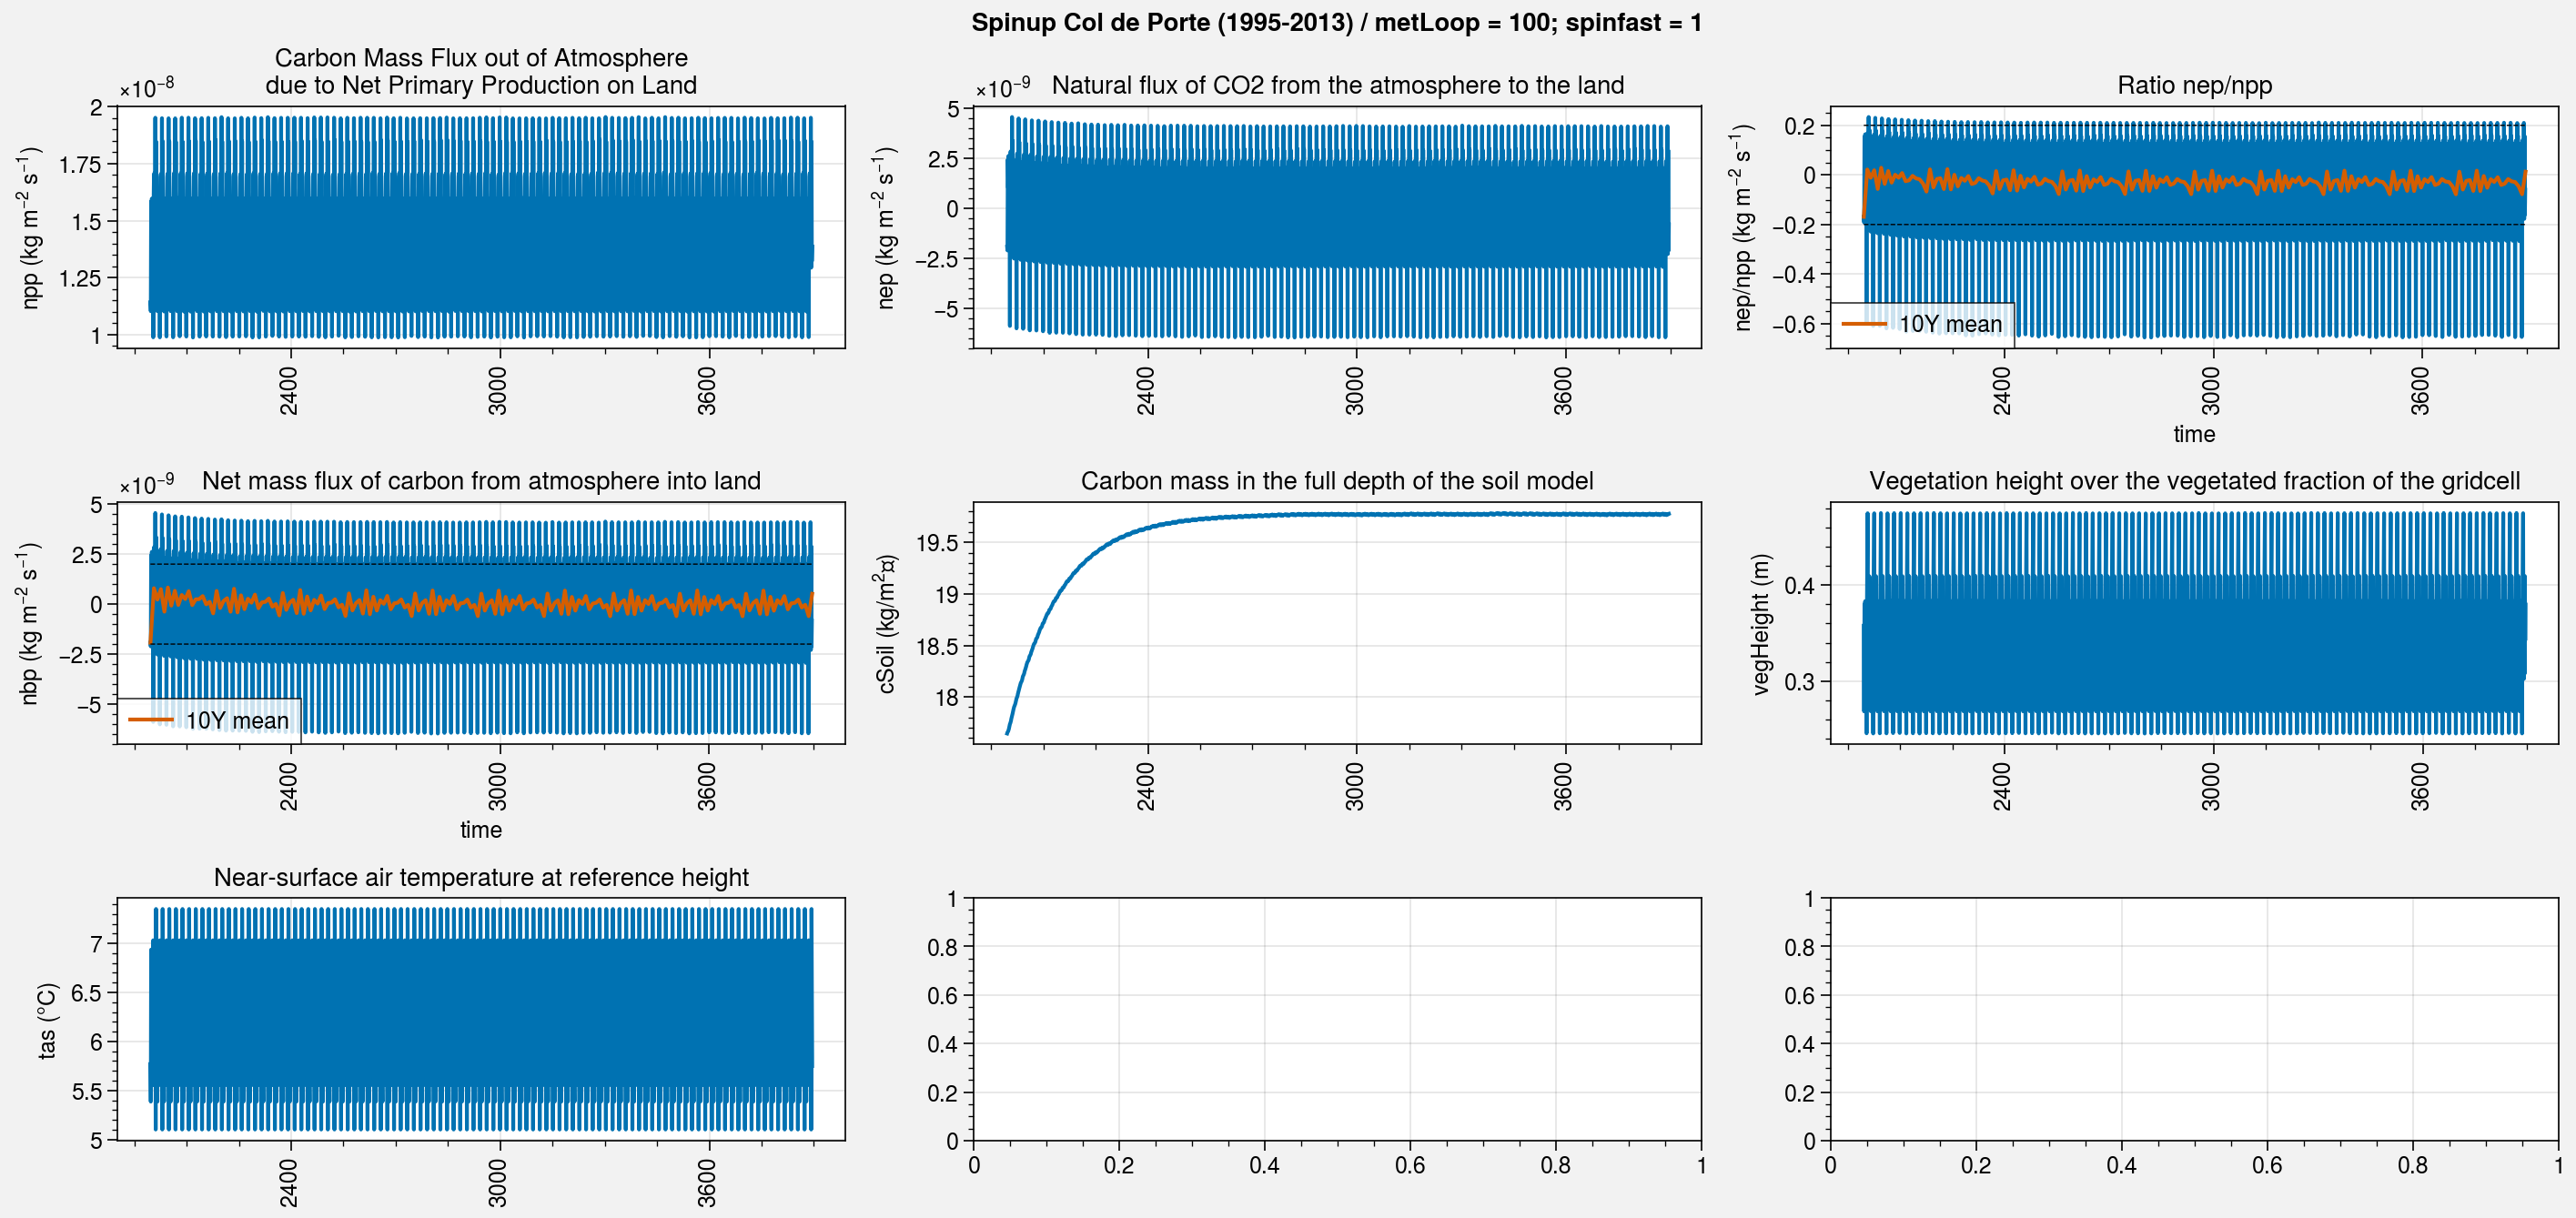

In [7]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# nep
axs[1].plot(nep)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# nep/npp
axs[2].plot(nep/npp)
k = axs[2].plot((nep/npp).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
k = axs[3].plot(nbp.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
axs[4].plot(cSoil)
axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# vegHeight
axs[5].plot(vegHeight)
axs[5].format(title='Vegetation height over the vegetated fraction of the gridcell', ylabel='vegHeight ('+vegHeight.units+')')

# tas
axs[6].plot(tas-273.15)
axs[6].format(title=tas.long_name, ylabel='tas (°C)')

fig.suptitle('Spinup Col de Porte (1995-2013) / metLoop = 100; spinfast = 1')

Text(0.5, 0.98, 'Spinup Col de Porte (1995-2013) / metLoop = 100; spinfast = 1')

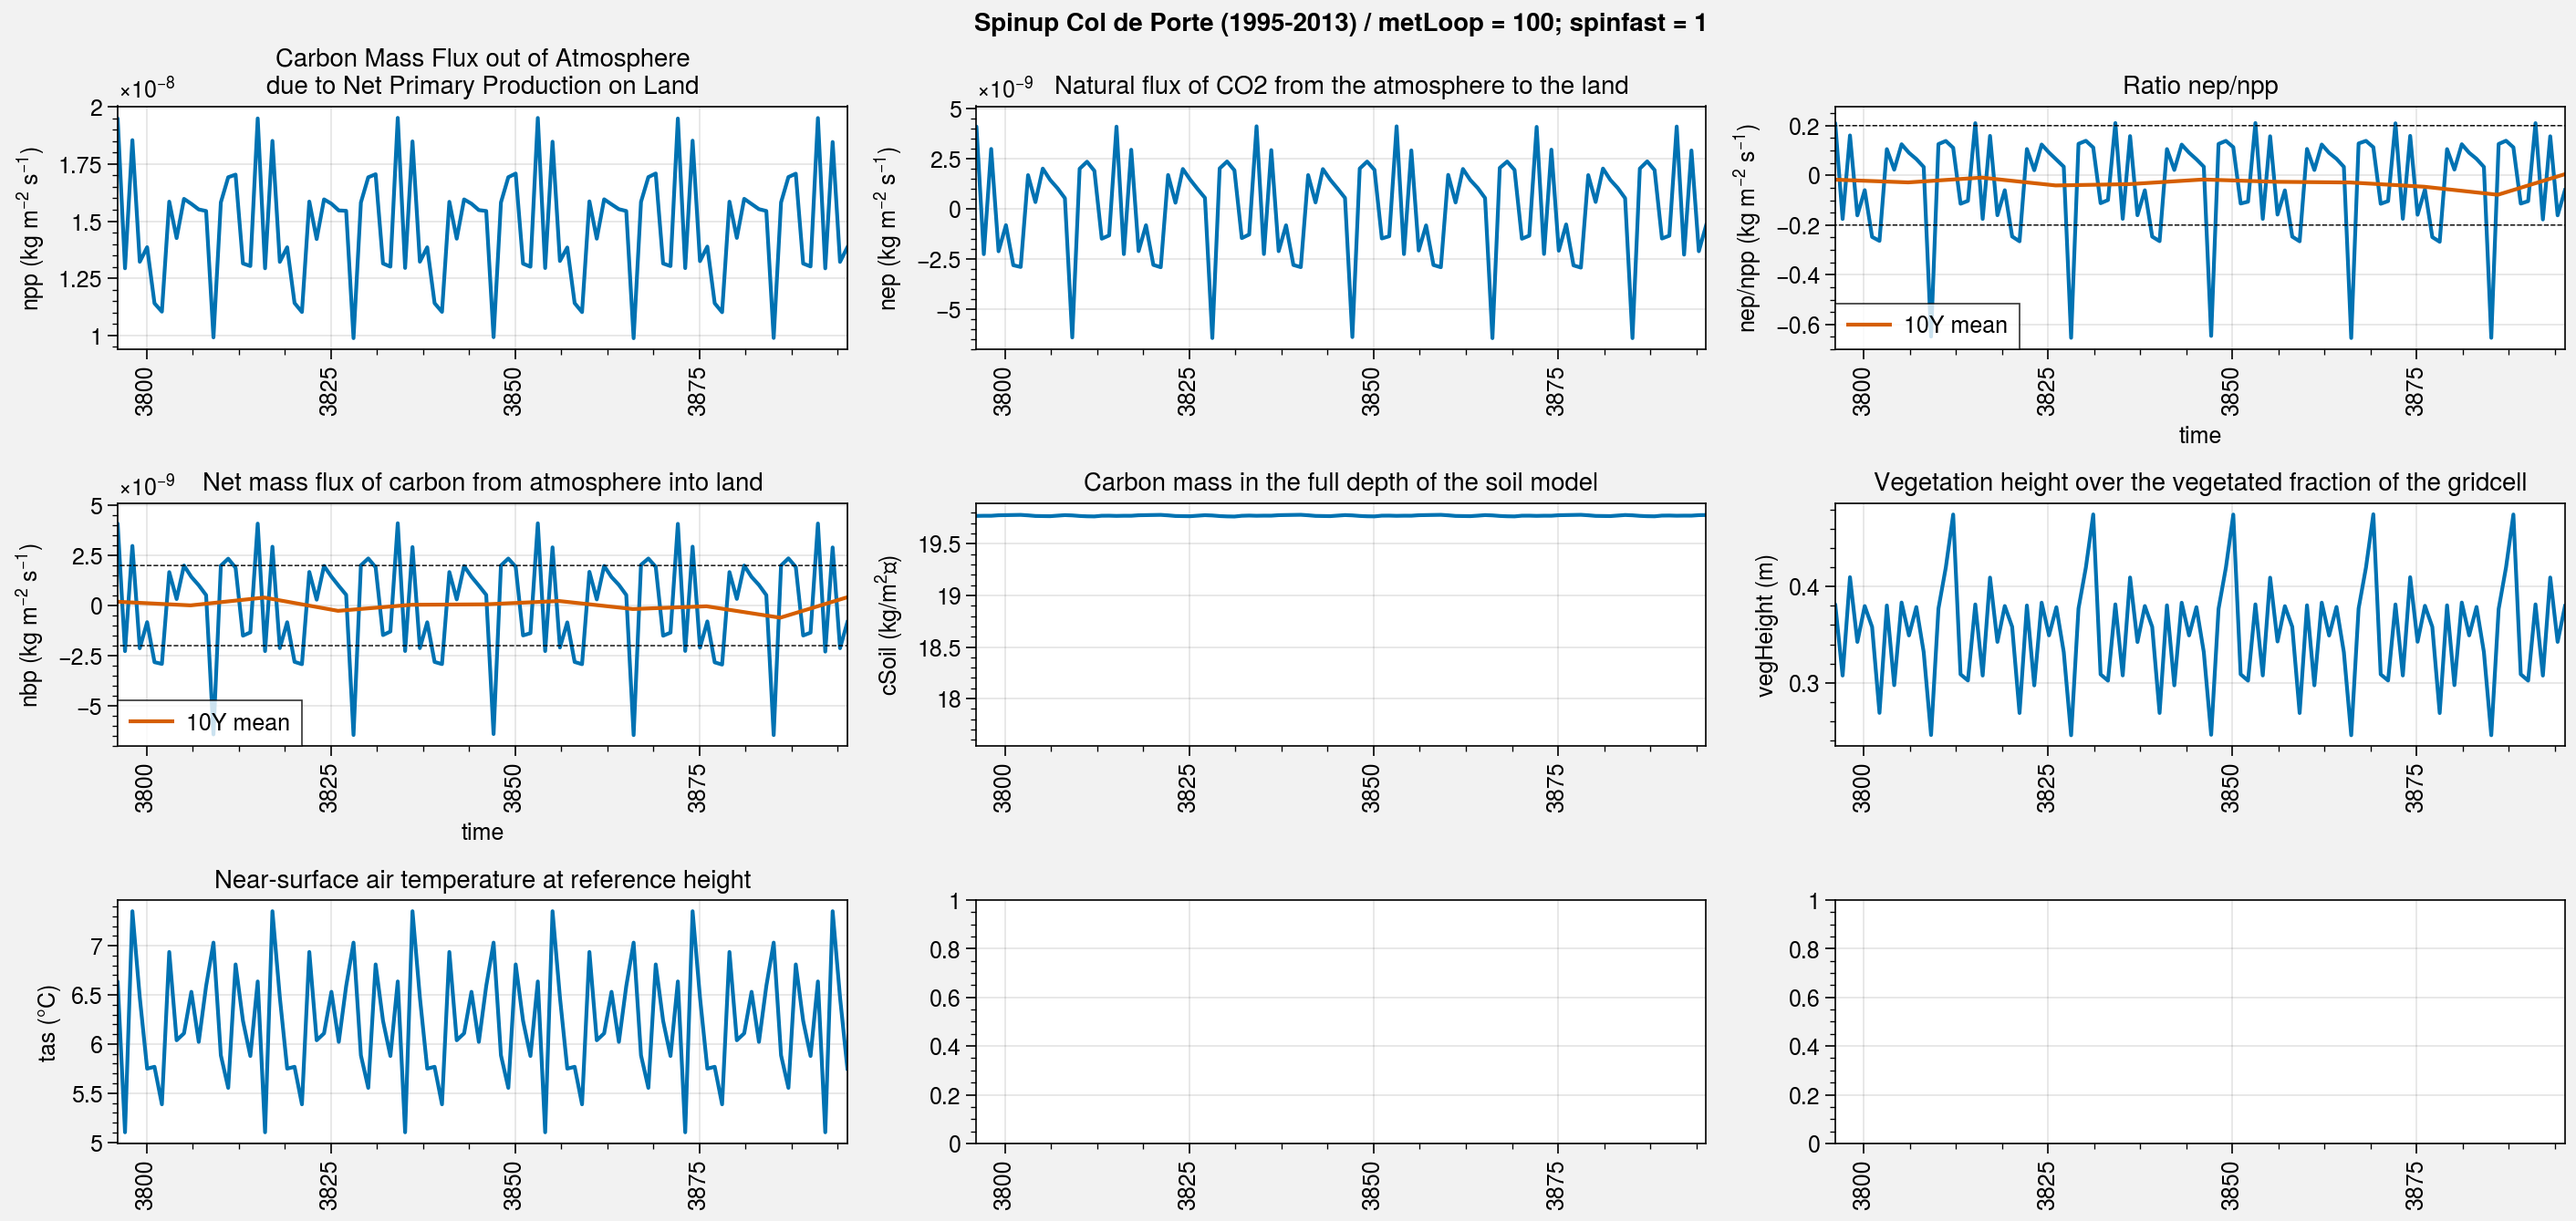

In [17]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# nep
axs[1].plot(nep)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# nep/npp
axs[2].plot(nep/npp)
k = axs[2].plot((nep/npp).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
k = axs[3].plot(nbp.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
axs[4].plot(cSoil)
axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# vegHeight
axs[5].plot(vegHeight)
axs[5].format(title='Vegetation height over the vegetated fraction of the gridcell', ylabel='vegHeight ('+vegHeight.units+')')

# tas
axs[6].plot(tas-273.15)
axs[6].format(title=tas.long_name, ylabel='tas (°C)')

for ax in axs:
    ax.format(xlim=(tas.time[-100].values.item(0),tas.time[-1].values.item(0)))

fig.suptitle('Spinup Col de Porte (1995-2013) / metLoop = 100; spinfast = 1')